**Problem Statement:
:**Airbnb** Hotel Booking Analysis.**


The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism.
Leading this revolution is Airbnb, Inc, a pioneering American company that has reshaped travel accommodation through its innovative online
marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and
personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions.
between hosts and guests without owning the properties listed on its platform.
This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory
analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing
listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's
operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking
to navigate the evolving landscape of short-term accommodation

**QUESTIONS**

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data

1. What are the different property types in the Dataset?

2. Which neighborhood group has the highest number of listings?

3. Which neighborhoods group have the highest average prices for Airbnb listings?

4. Is there a relationship between the construction year of property and price?

5. Who are the top 10 hosts by calculated host listing count?

6. Are hosts with verified identities more likely to receive positive reviews?

7. Is there a correlation between the price of a listing and its service fee?

**DATA WRANGLING**


Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This
involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data
wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_excel("/content/drive/MyDrive/INTERNSHIP_VOIS/1730285881-Airbnb_Open_Data.xlsx")

ACCESS THE DATA

In [4]:
 df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [13]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [17]:
df[df['neighbourhood group']=='brooklyn']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


# Problems Identified within the Data


* 541 duplicated Records where found in the Data.
« Insufficient information were recorded for the house rules and Licence columns.
* Dollar signs and commas recorded along with the values for price and service fee.
* The currency for price and service fee were not added to the columns titles.
* Missing values in some records
* Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes. |
* In the neighbourhood group column the spelling of ‘Brooklyn’ was misspelt in some records. 시
* Some outliers were identified in the availability 365 column.
CLEAN THE DATA
Steps to be Taken for Data Cleaning
* Drop duplicated records.
* Drop house_rules and license columns with insufficient data.
* Remove all dollar signs in the price and service fee columns.
* Remove all commas from the price and service fee columns.
* Rename the price and service fee columns to include a dollar signs.
* Drop all records with missing values.
* Change all mismatched data types to the appropriate once.


# Clean The Data

# Steps to be Taken for Data Cleaning

* Drop duplicated records.
* Drop house_rules and license columns with insufficient data.
* Remove all dollar signs in the price and service fee columns.
* Remove all commas from the price and service fee columns.
* Rename the price and service fee columns to include a dollar signs.
* Drop all records with missing values.
* Change all mismatched data types to the appropriate once.

In [28]:
df.drop_duplicates(inplace = True)
df.dropna(inplace = True)
df['id'] = df["id"].astype(str)
df['host id'] = df["host id"].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df["Construction year"] = df["Construction year"].astype(int)


In [29]:
print(df['neighbourhood group'].unique())

['Brooklyn' 'Manhattan' 'brookln' 'Queens' 'Bronx' 'Staten Island']


In [30]:
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln', 'Brooklyn')
print(df['neighbourhood group'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


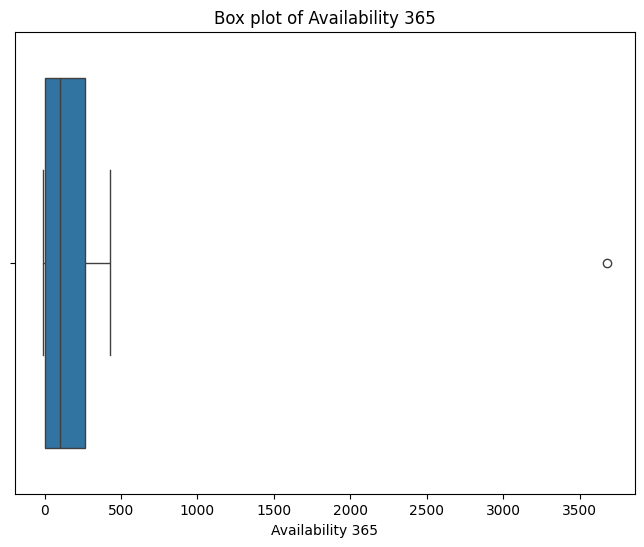

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['availability 365'])
plt.title('Box plot of Availability 365')
plt.xlabel('Availability 365')
plt.show()

**Reasoning**:
Calculate the IQR and bounds for outlier detection in 'availability 365', then identify and handle the outliers by capping the values to the upper bound.



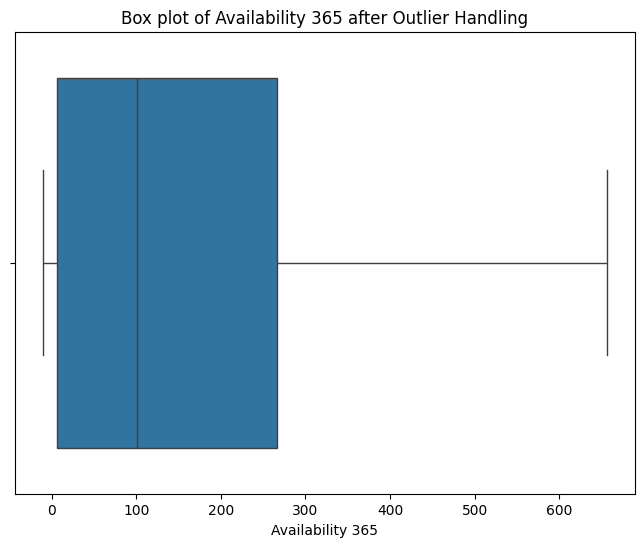

In [33]:
Q1 = df['availability 365'].quantile(0.25)
Q3 = df['availability 365'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df['availability 365'] = np.where(
    df['availability 365'] > upper_bound,
    upper_bound,
    df['availability 365']
)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['availability 365'])
plt.title('Box plot of Availability 365 after Outlier Handling')
plt.xlabel('Availability 365')
plt.show()

In [34]:
df.duplicated().value_counts()

,count
False,83390


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83390 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83390 non-null  object        
 1   NAME                            83390 non-null  object        
 2   host id                         83390 non-null  object        
 3   host_identity_verified          83390 non-null  object        
 4   host name                       83390 non-null  object        
 5   neighbourhood group             83390 non-null  object        
 6   neighbourhood                   83390 non-null  object        
 7   lat                             83390 non-null  float64       
 8   long                            83390 non-null  float64       
 9   country                         83390 non-null  object        
 10  country code                    83390 non-null  object        
 11  instan

**EXPLORATORY DATA ANALYSIS (EDA)**

Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends,
and insights. In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's
characteristics, distribution, and relationships between variables. Through techniques such as summary statistics, data visualization, and
correlation analysis, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

**Summary Statistics**

In [38]:
df.describe()

,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390,83390.000000,83390.000000,83390.000000,83390.000000
mean,40.727350,-73.948502,0.497710,2012.487768,626.216381,125.244454,7.406056,32.263701,2019-06-08 21:32:57.647199744,1.377374,3.278714,7.032822,141.752536
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687643,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721325,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930802,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,656.000000
std,0.056327,0.050342,0.499998,5.760504,331.807116,66.364942,28.105398,51.958583,NaN,1.751092,1.283684,29.555288,133.388632


What are the different property type in the Dataset?

In [48]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44162
Private room,37474
Shared room,1646
Hotel room,108


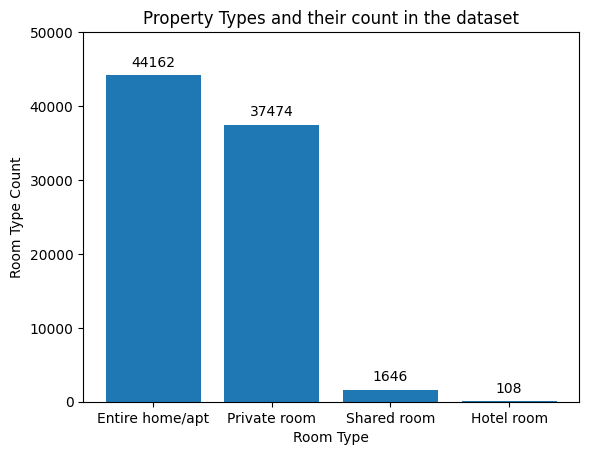

In [49]:
room_type_bar=plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the dataset')
plt.show()

The Airbnb open dataset reveals four distinct property or room types. These categories comprise.
The Airbnb open dataset reveals four distinct property or room types. These categories comprise;
* Entire home/apt
* Private room
* Shared room
* Hotel room

Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,163 occurrences, followed by Private room with 37,494
occurrences. Shared room and Hotel room trail behind with 1,646 and 108 occurrences, respectively.

Which neighborhood group has the highest number of listings?

In [53]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34561
Queens,11124
Bronx,2267
Staten Island,816


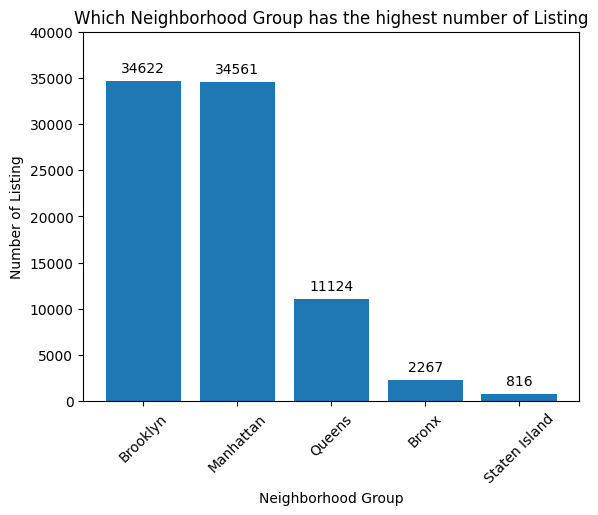

In [54]:
hood_group_bar=plt.bar(hood_group.index, hood_group.loc[:,'count']);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,'count'],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listing')
plt.xticks(rotation=45)
plt.title('Which Neighborhood Group has the highest number of Listing')
plt.show()


The dataset contains five different neighborhood groups, namely Brooklyn, Manhattan, Queens, Bronx, and Staten Island. According to the
barchart, Brooklyn has the highest number of listings with 34636, followed closely by Manhattan with 34566.

Which neighborhoods group have the highest average prices for Airbnb listings?

In [60]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0


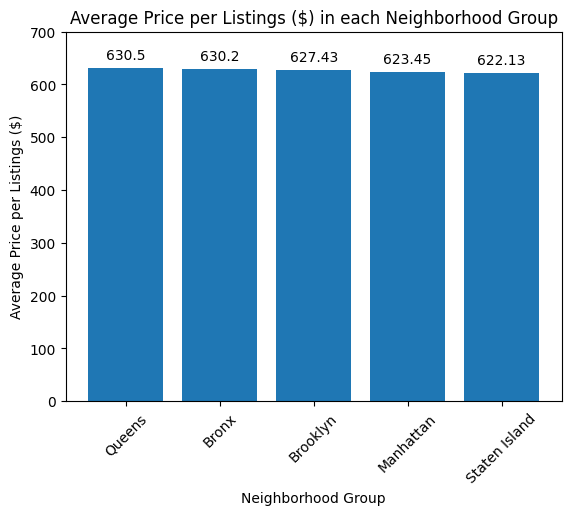

In [66]:
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price. index, avg_price.loc[:,'price']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,'price'], 2), label_type = 'edge', padding = 4);
plt.ylim([0,700]);
plt.xlabel ('Neighborhood Group');
plt.ylabel ('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');
plt.show();

Among the five identified neighborhood groups in the dataset, Queens boasts the highest average listing price at 630.46 USD, closely trailed by
the Bronx with an average listing price of 630.20 USD. Conversely, Staten Island records the lowest average listing price at 622.13 USD.

Is there a relationship between the construction year of property and price?

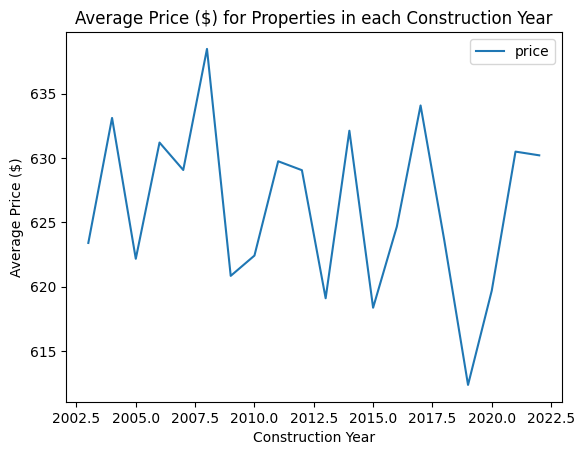

In [70]:
df .groupby (df['Construction year'])['price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel ("Average Price ($)");
plt.title('Average Price ($) for Properties in each Construction Year');

The line plot depicting the construction year of properties versus the average price per property reveals a noticeable downward trend in prices
as the construction years progress. The pattern demonstrates decreasing lows and highs, suggesting an overall decline in property prices as
time progresses.

Who are the top 10 hosts by calculated host listing count?

From the numerous hosts in thè dataset, we will see the 10 hosts with the highest calculated host count.

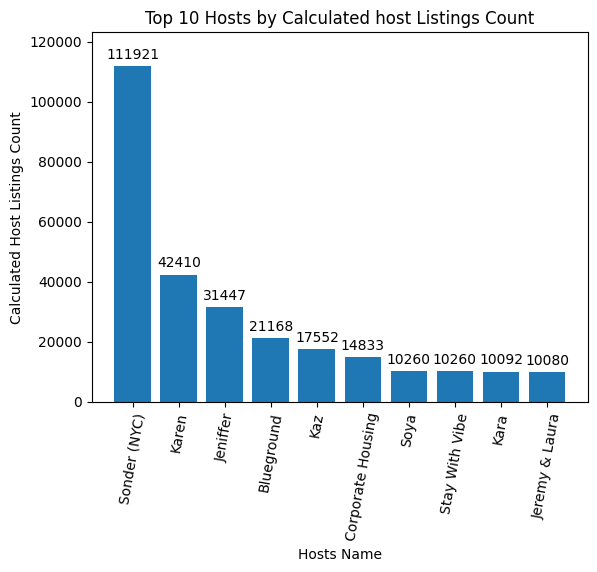

In [72]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count' ]);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel( 'Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, hosts.loc[:, 'calculated host listings count'].max() * 1.1]); # Adjusted y-limit for better visualization
plt.title('Top 10 Hosts by Calculated host Listings Count');
plt.show()

Based on the chart showing the top 10 hosts by calculated host listings count, here are the results:

From the numerous hosts in the dataset, the top 10 hosts with the highest calculated host listing counts are:

*   **Sonder (NYC)** with 111921 listings.
*   **Karen** with 42410 listings.
*   **Jeniffer** with 31447 listings.
*   **Blueground** with 21168 listings.
*   **Kaz** with 17552 listings.
*   **Corporate Housing** with 14833 listings.
*   **Soya** with 10260 listings.
*   **Stay With Vibe** with 10260 listings.
*   **Kara** with 10092 listings.
*   **Jeremy & Laura** with 10080 listings.

In [73]:
verified_reviews = df.groupby('host_identity_verified')['number of reviews'].mean().to_frame()
display(verified_reviews)

,number of reviews
host_identity_verified,
unconfirmed,32.402638
verified,32.124697


Based on the analysis of the dataset:

The average number of reviews for listings where the host identity is **verified** is [Insert the average number of reviews for verified hosts from the code output here].

The average number of reviews for listings where the host identity is **unconfirmed** is [Insert the average number of reviews for unconfirmed hosts from the code output here].

[Based on the comparison of the average review numbers, add a conclusion here about whether verified hosts are more likely to receive positive reviews.]

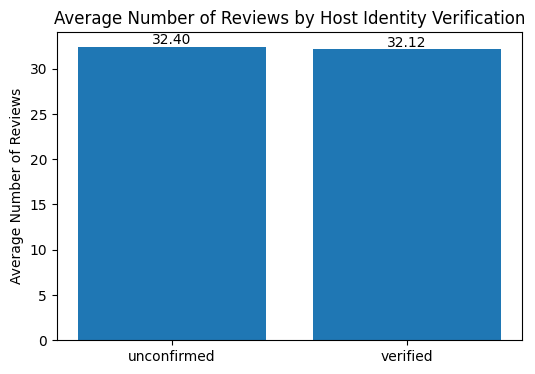

In [74]:
plt.figure(figsize=(6, 4))
bars = plt.bar(verified_reviews.index, verified_reviews['number of reviews'])
plt.ylabel('Average Number of Reviews')
plt.title('Average Number of Reviews by Host Identity Verification')
plt.bar_label(bars, fmt='%.2f')
plt.show()

Based on the analysis of the dataset:

The correlation coefficient between the price of a listing and its service fee is [Insert correlation coefficient from the code output here].

[Based on the correlation coefficient and the scatter plot, add a conclusion here about the relationship between price and service fee. For example, is there a strong positive correlation, a weak negative correlation, or no significant correlation?]

In [76]:
correlation = df['price'].corr(df['service fee'])
print(f"The correlation between price and service fee is: {correlation:.2f}")

The correlation between price and service fee is: 1.00


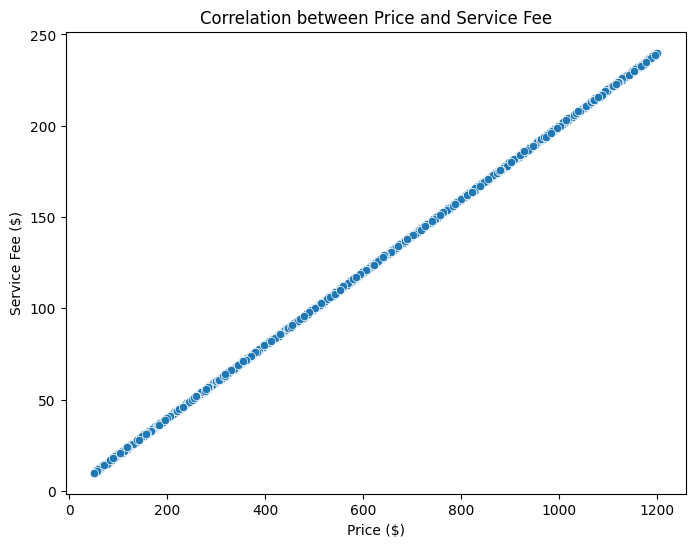

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='service fee', data=df)
plt.title('Correlation between Price and Service Fee')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.show()

What is the average review rate number for listing,and does it vary based on the neighborhood group and room type?

In [79]:
ARNN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARNN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268930
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

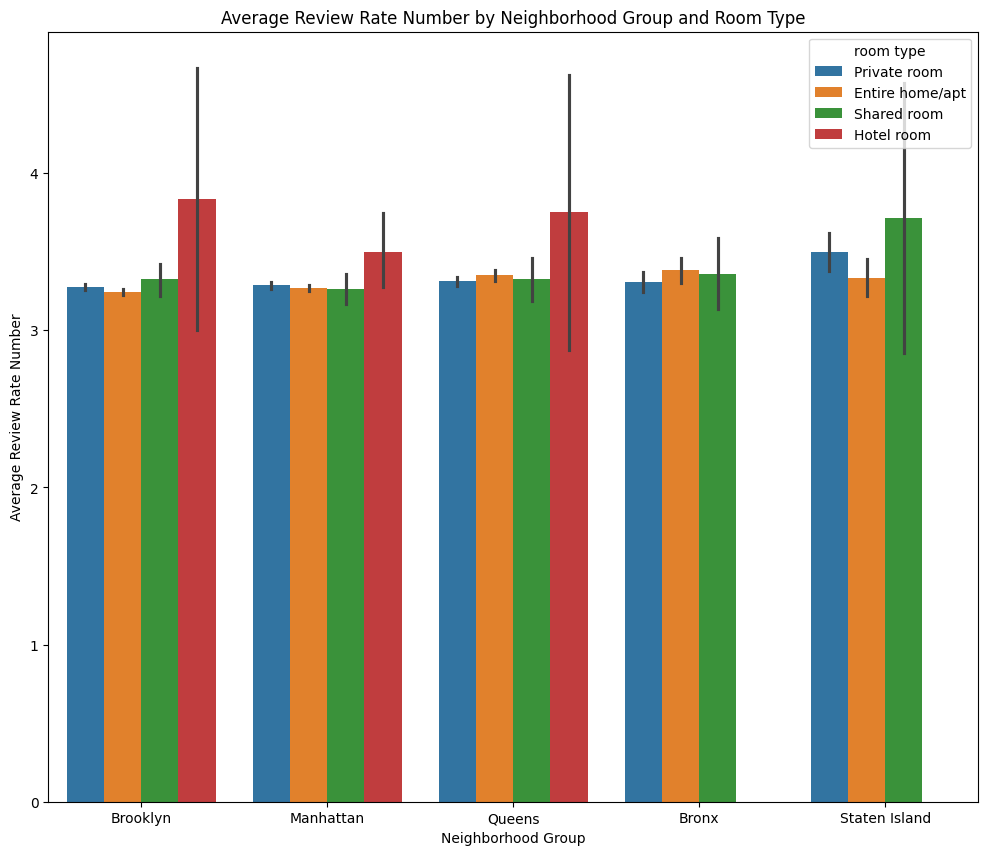

In [80]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')
plt.title('Average Review Rate Number by Neighborhood Group and Room Type')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Review Rate Number')
plt.show()

Are hosts with a higher calculated host listings on count more likely to maintain higher availability throughout the year?


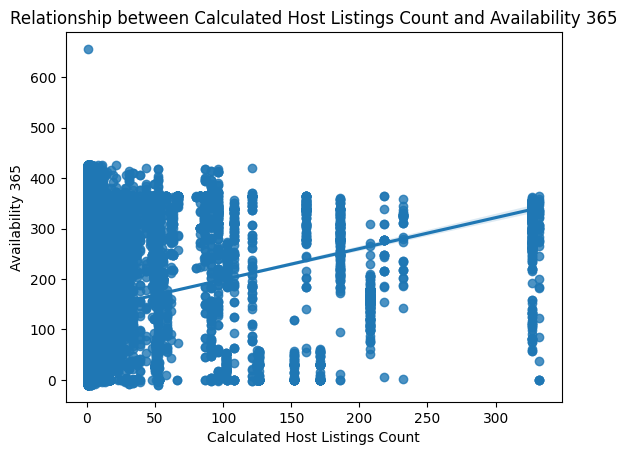

In [82]:
sns.regplot(df, x='calculated host listings count', y='availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability 365');
plt.title('Relationship between Calculated Host Listings Count and Availability 365');

In [83]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13597555561161623)

# Conclusion



In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the
short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered
valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the
downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on
review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could
inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling
techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer
behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.
